<h1>By: Joel <br> Class: DAAA/2B/06<br> admin no: 2112729</h1>
<h1>

# Cifar-100 
> Collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.State of the art accuracy is at 96.808 as of 2022 

Research on the dataset:
> Cifar 100 contains 80 million tiny dataset images. They are colored which means they have 3 channels and each channel has 32 by 32 pixels.
The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks. 

|  SuperClass |  Classes |   
|-------------|---|
| aquatic mammals  |  	beaver, dolphin, otter, seal, whale |  
|   fish    |  	aquarium fish, flatfish, ray, shark, trout | 
|  flowers |  	orchids, poppies, roses, sunflowers, tulips |
|food containers|	bottles, bowls, cans, cups, plates |
|fruit and vegetables|apples, mushrooms, oranges, pears, sweet peppers|
|household electrical devices|clock, computer keyboard, lamp, telephone, television|
|household furniture|bed, chair, couch, table, wardrobe|
|insects|	bee, beetle, butterfly, caterpillar, cockroach|
|large carnivores|	bear, leopard, lion, tiger, wolf|
|large man-made outdoor things|	bridge, castle, house, road, skyscraper|
|large natural outdoor scenes|	cloud, forest, mountain, plain, sea|
|large omnivores and herbivores|	camel, cattle, chimpanzee, elephant, kangaroo|
| medium-sized mammals|fox, porcupine, possum, raccoon, skunk|
| non-insect invertebrates|	crab, lobster, snail, spider, worm|
|people|	baby, boy, girl, man, woman|
|reptiles|	crocodile, dinosaur, lizard, snake, turtle|
|small mammals|	hamster, mouse, rabbit, shrew, squirrel|
|trees|	maple, oak, palm, pine, willow|
|vehicles_1|	bicycle, bus, motorcycle, pickup truck, train|
|vehicles_2|	lawn-mower, rocket, streetcar, tank, tractor|

In [1]:
# pip install keras-tuner --upgrade 

In [1]:
import tensorflow 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.datasets import cifar100
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization,LeakyReLU
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras import regularizers
from sklearn.model_selection import train_test_split
import keras_cv
from numpy import mean
from numpy import std
from matplotlib import pyplot
from keras.optimizers import SGD
import gc
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import precision_score , recall_score , f1_score , accuracy_score , confusion_matrix
from keras import layers
from keras.initializers import RandomNormal,Constant
import visualkeras

c:\Users\LG\.conda\envs\gpu_env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Exploratory Data analysis

## Key conclusions:
- 500 data points per class in train 
- 400 data 

In [2]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()
assert X_train.shape == (50000, 32, 32, 3)
assert X_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [3]:
# split into train and val sets using train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)


# print unique classes count
print("Unique classes count:", len(np.unique(y_train)))

# print unique classes
y_train_df = pd.DataFrame(y_train)
print(y_train_df[0].value_counts())


y_test_labels = y_test
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)
print('after',y_train.shape,y_test.shape)


X_train shape: (40000, 32, 32, 3) y_train shape: (40000, 1)
X_test shape: (10000, 32, 32, 3) y_test shape: (10000, 1)
Unique classes count: 100
4     400
2     400
84    400
15    400
37    400
     ... 
62    400
41    400
12    400
0     400
93    400
Name: 0, Length: 100, dtype: int64
after (40000, 100) (10000, 100)


In [5]:
print(y_train_df[0].value_counts())


4     400
2     400
84    400
15    400
37    400
     ... 
62    400
41    400
12    400
0     400
93    400
Name: 0, Length: 100, dtype: int64


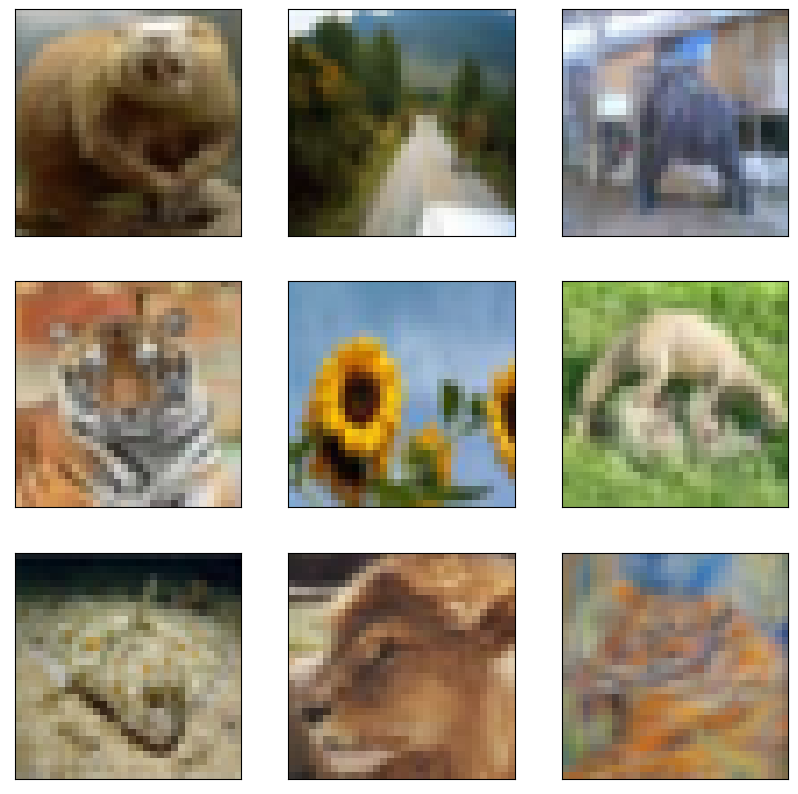

In [6]:
# show some images of the dataset
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i])
    ax.set(xticks=[], yticks=[])
plt.show()



In [4]:
# Functions for plotting
import plotly
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from plotly.subplots import make_subplots
def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace
    
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
   
    fig = make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])

    
    iplot(fig, filename=f'accuracy-loss_{train_model}')
    

# CNN Baseline
> CIFAR 100 seems to be alot harder for a simple CNN model to recognize

![](./image/Filtering.gif)
> Image is different from a typical MNIST dataset as it is now coloured, below is a sneak peak of what goes on in the code below

In [9]:


epochs = 15
num_classes = 100
seed = np.random.seed(1)






cifar_model = Sequential()
cifar_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32,32,3)))
cifar_model.add(Conv2D(64, (3, 3), activation='relu'))
cifar_model.add(Flatten())
cifar_model.add(Dense(128, activation='relu'))
cifar_model.add(Dense(num_classes, activation='softmax'))

cifar_model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
cifar_model.summary()

h_callback = cifar_model.fit(X_train, y_train, epochs = 10,
               validation_data=(X_val, y_val))

# Plot train vs test loss during training 
plot_accuracy_and_loss(h_callback)
# function to get precision, recall and f1 score

test_loss , test_acc = cifar_model.evaluate(X_test, y_test)

def get_metrics(model,X_test = X_test):
    predictions = np.argmax(model.predict(X_test), axis=-1)
    precision = precision_score(y_test_labels, predictions, average='macro')
    recall = recall_score(y_test_labels, predictions, average='macro')
    f1 = f1_score(y_test_labels, predictions, average='macro')
    return precision,recall,f1
precision,recall,f1 = get_metrics(cifar_model)

# Dataframe to keep track of all model scores

Model_scores = pd.DataFrame([['CNN baseline',test_acc,test_loss,precision,recall,f1]],columns=['Model','Accuracy','Loss','Precision','Recall','F1 Score'])





gc.collect()
tf.keras.backend.clear_session()
del cifar_model

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 flatten_4 (Flatten)         (None, 50176)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               6422656   
                                                                 
 dense_9 (Dense)             (None, 100)               12900     
                                                                 
Total params: 6,454,948
Trainable params: 6,454,948
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1250/1250 [======================

313/313 [==============================] - 6s 17ms/step


# Data augmentation
> I definitely do not have enough datasets and will have to create more data by augmenting .

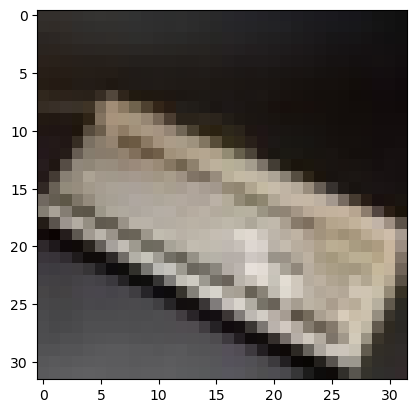

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


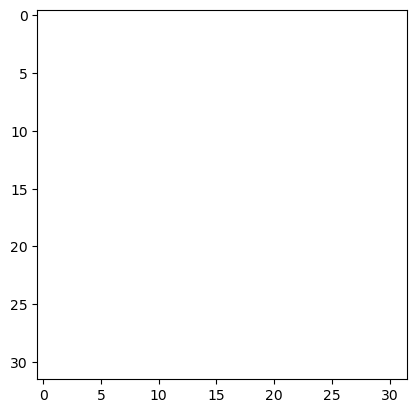

In [11]:

plt.imshow(X_train[12])
plt.show()


X_train_augmented = X_train.copy()
y_train_augmented = y_train.copy()



# ImageDataGenerator rotation
datagen = ImageDataGenerator(
	featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=90,
    shear_range=0.2,
    zoom_range=0.2,
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=True)


datagen.fit(X_train_augmented)
X_train_augmented = datagen.flow(X_train_augmented,y_train_augmented, batch_size = X_train_augmented.shape[0], shuffle=False).next()
# change X_train_augmented to float32
X_train_augmented = X_train_augmented[0].astype('float32')

plt.imshow(X_train_augmented[12])
plt.show()




# concat the original and augmented data
X_train = np.concatenate((X_train,X_train_augmented),axis=0)
y_train = np.concatenate((y_train,y_train_augmented),axis=0)


## Feature wise Normalization, Centering or Standardization does it help?

- Pixel Normalization: scale pixel values to the range 0-1. 
- Pixel Centering: scale pixel values to have a zero mean. (images seem to be already centered)
- Pixel Standardization: scale pixel values to have a zero mean and unit variance. (Images are already standardized as they all have pixels from 0 to 255)

> I will compare the differences using a simple cnn model 


# Dense Neural Network / Multi layer perceptrons (MLPs) 
## MLP is a Artificial Neural Network consisting of at least 3 layers ( input , hidden layer and output) 

In [12]:
def plot_loss(loss,test_loss):
    plt.figure()
    plt.plot(loss)
    plt.plot(test_loss)
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()

def plot_accuracy(acc,test_acc):
    plt.figure()
    plt.plot(acc)
    plt.plot(test_acc)
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()
  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 100)               3300      
                                                                 
Total params: 406,980
Trainable params: 406,980
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
2500/2500 [============================

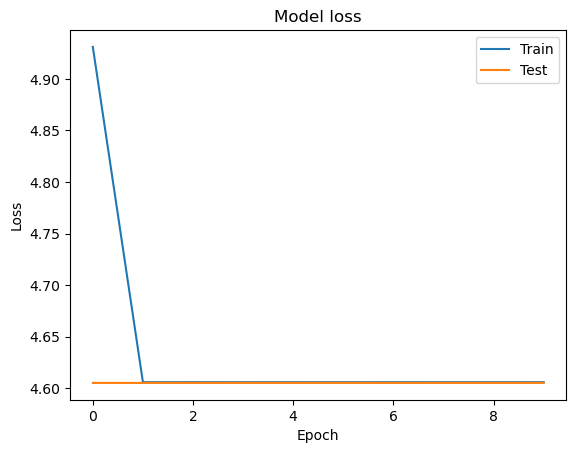

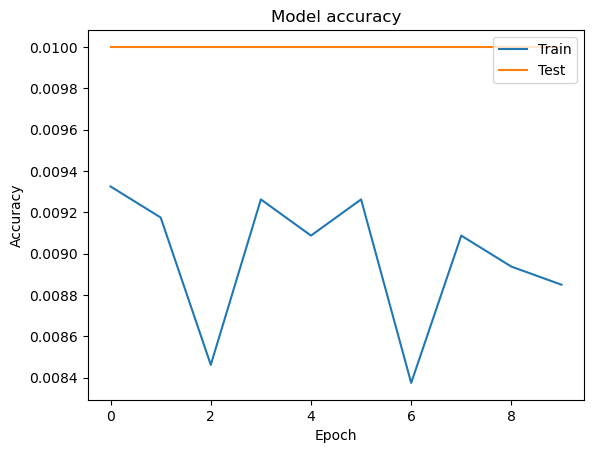

In [13]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(100, activation='sigmoid'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

h_callback = model.fit(X_train, y_train,epochs = 10,
               validation_data=(X_val, y_val))

results=model.evaluate(X_test, y_test, batch_size=32, verbose=2)

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])


gc.collect()
tf.keras.backend.clear_session()
del model


## Conclusion on MLP

In [14]:

# baseline cnn model for cifar mnist



# evaluate a model using k-fold cross-validation
def evaluate_model(model,dataX, dataY, n_folds=5,valX=X_val,valy=y_val):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        h_callback = EarlyStopping(monitor='val_loss', patience=5)
        # fit model
        history = model.fit(trainX, trainY, epochs=50, validation_data=(testX, testY), verbose=0,callbacks=[h_callback], batch_size=32) 
        # evaluate model
        _, acc = model.evaluate(valX, valy, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # append scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        pyplot.subplot(211)
        pyplot.title('Cross Entropy Loss')
        pyplot.plot(histories[i].history['loss'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        pyplot.subplot(212)
        pyplot.title('Classification Accuracy')
        pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
        pyplot.legend()
    pyplot.show()

# summarize model performance
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    pyplot.boxplot(scores)
    pyplot.show()

# run the test harness for evaluating a model
def run_test_harness(model,X_train, y_train):
    # evaluate model
    scores, histories = evaluate_model(model,X_train, y_train)
    # learning curves
    summarize_diagnostics(histories)
    # summarize estimated performance
    summarize_performance(scores)
    # ran into memory leakage problem trying to fix with this
    gc.collect()
    tf.keras.backend.clear_session()
    del model
   
# function to get precision, recall and f1 score
def get_metrics(model,X_test = X_test):
    predictions = np.argmax(model.predict(X_test), axis=-1)
    precision = precision_score(y_test_labels, predictions, average='macro')
    recall = recall_score(y_test_labels, predictions, average='macro')
    f1 = f1_score(y_test_labels, predictions, average='macro')
    return precision,recall,f1


# CNNs 
### Max Pooling
- With every stride the highest number found is retrieved in an area
- Effective as a noise suppresant discarding all noisy activations and only taking the prominant feature in an area 

### Average Pooling 
- Retrieves the average of all the values in an area
- may not perform as well as max pooling since it is just averaging the noise in images

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

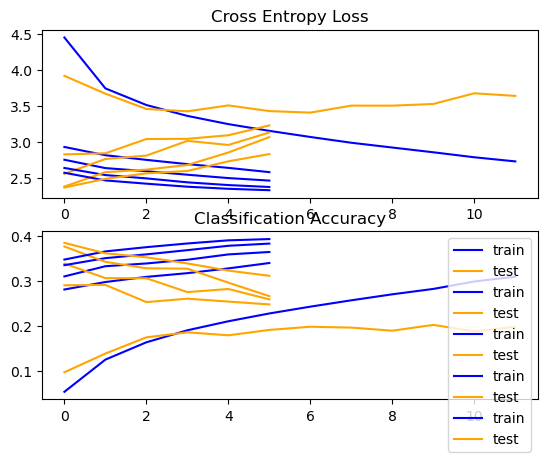

Accuracy: mean=20.894 std=0.958, n=5


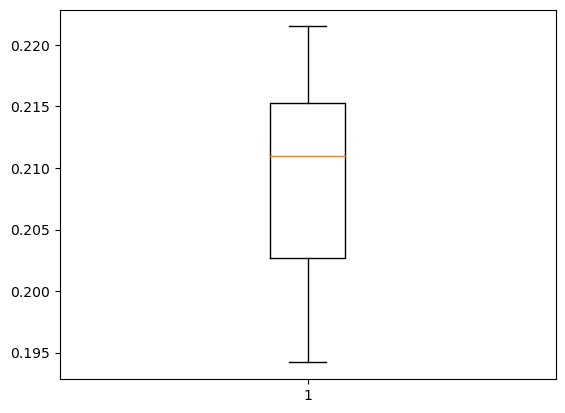

313/313 [==============================] - 0s 1ms/step


In [15]:
def model_max_pooling():
    # define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32,32,3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])
    model.summary()
    return model

model_max_pooling = model_max_pooling()
run_test_harness(model_max_pooling,X_train, y_train)

model_max_pooling.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
precision,recall,f1 = get_metrics(model_max_pooling)
Model_scores = pd.concat([Model_scores,pd.DataFrame([['simple CNN relu max pooling',test_acc,test_loss,precision,recall,f1]],columns=Model_scores.columns)],ignore_index=True)





> 22.990
> 22.000
> 22.160
> 21.750
> 20.400


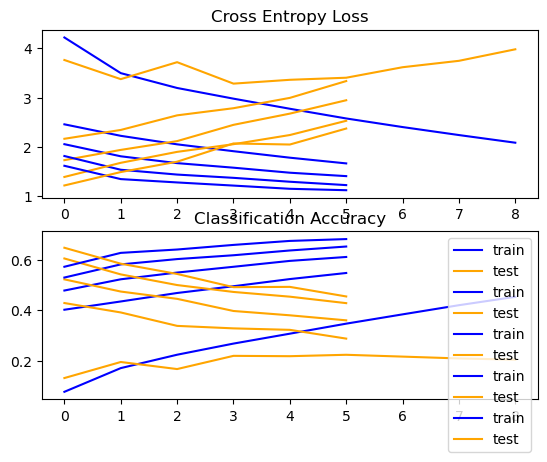

Accuracy: mean=21.860 std=0.840, n=5


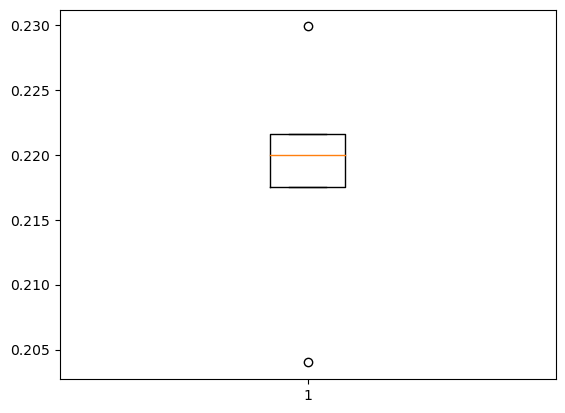

313/313 [==============================] - 0s 1ms/step


In [16]:
from keras.layers import AveragePooling2D
def model_average_pooling():
    # define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32,32,3)))
    model.add(AveragePooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])
    return model
model_average_pooling = model_average_pooling()
run_test_harness(model_average_pooling,X_train, y_train)



model_average_pooling.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
precision,recall,f1 = get_metrics(model_average_pooling)
Model_scores = pd.concat([Model_scores,pd.DataFrame([['simple CNN relu avg pooling',test_acc,test_loss,precision,recall,f1]],columns=Model_scores.columns)],ignore_index=True)


In [ ]:
def model_avg_mix_max_pool():
    # define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32,32,3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])
    return model
model_avgmax_pooling = model_avg_mix_max_pool()
run_test_harness(model_avgmax_pooling,X_train, y_train)



model_avgmax_pooling.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
precision,recall,f1 = get_metrics(model_avgmax_pooling)
Model_scores = pd.concat([Model_scores,pd.DataFrame([['simple CNN relu avg mix max pooling',test_acc,test_loss,precision,recall,f1]],columns=Model_scores.columns)],ignore_index=True)


### Conclusion Max Pooling or Average Pooling
> 

# Padding ( is it important? )

> 23.490
> 23.160
> 22.030
> 20.980
> 20.270


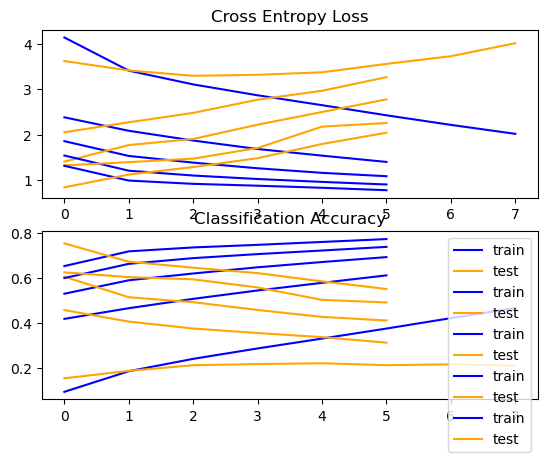

Accuracy: mean=21.986 std=1.233, n=5


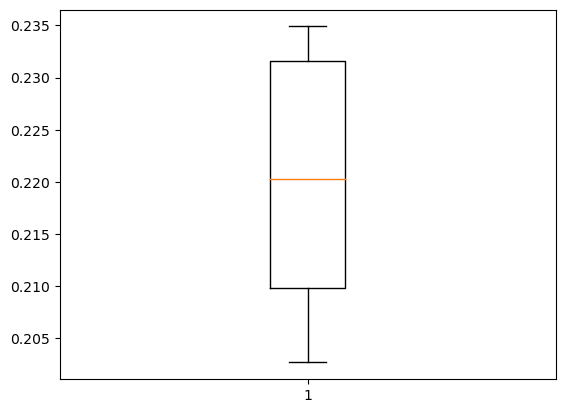

313/313 [==============================] - 0s 1ms/step


In [17]:
def model_padding():
    # define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32,32,3), padding='same'))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])
    return model

model_average_pooling_padding = model_padding()
run_test_harness(model_average_pooling_padding,X_train, y_train)



model_average_pooling_padding.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
precision,recall,f1 = get_metrics(model_average_pooling_padding)
Model_scores = pd.concat([Model_scores,pd.DataFrame([['CNN relu avg pooling w same padding ',test_acc,test_loss,precision,recall,f1]],columns=Model_scores.columns)],ignore_index=True)

## Valid padding

In [ ]:
def model_validpadding():
    # define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32,32,3), padding='valid'))
    model.add(MaxPooling2D((2, 2), padding='valid'))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='valid'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='valid'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])
    return model

modelmaxpool_valid_padding = model_validpadding()
run_test_harness(modelmaxpool_valid_padding,X_train, y_train)


modelmaxpool_valid_padding.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
precision,recall,f1 = get_metrics(modelmaxpool_valid_padding)
Model_scores = pd.concat([Model_scores,pd.DataFrame([['CNN relu avg pooling w valid padding ',test_acc,test_loss,precision,recall,f1]],columns=Model_scores.columns)],ignore_index=True)

### Conclusion whether valid or padding is better

> 


# Before moving on with testing other parameters of CNN, I will be increasing the neurons and layers as I think im currently still underfitting as there are models that can do alot better found online. I will be adding more convolutional layers to see if it helps. 

# Batch Normalization

## Without batch normalization

In [ ]:
from keras.layers import BatchNormalization
from keras.layers import Activation
def cifar_model_no_batch_norm():
    model = Sequential()
    
    model.add(Conv2D(256,(3,3),padding='same',input_shape=(32,32,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(256,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dense(100,activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])
    return model

cifar_model_no_batch_norm = cifar_model_no_batch_norm()

run_test_harness(cifar_model_no_batch_norm,X_train, y_train)

cifar_model_no_batch_norm.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
precision,recall,f1 = get_metrics(cifar_model_no_batch_norm)
Model_scores = pd.concat([Model_scores,pd.DataFrame([['deep CNN relu adamax no batch norm',test_acc,test_loss,precision,recall,f1]],columns=Model_scores.columns)],ignore_index=True)

del cifar_model_no_batch_norm
gc.collect()
tf.keras.backend.clear_session()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 64)                3211328   
                                                                 
 dense_1 (Dense)             (None, 100)               6500      
                                                        

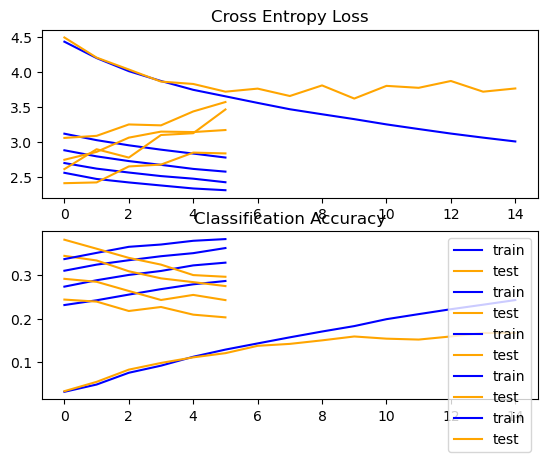

Accuracy: mean=17.928 std=0.573, n=5


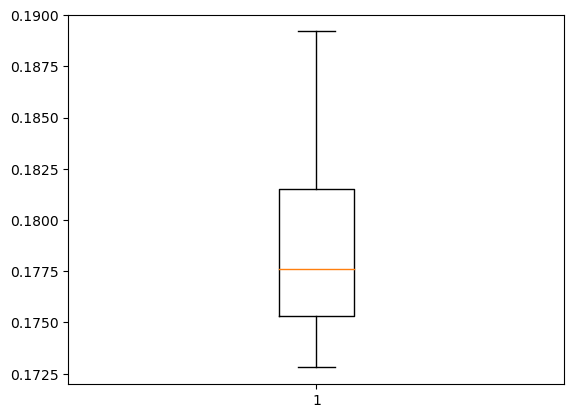

313/313 [==============================] - 1s 1ms/step
CPU times: total: 21min 34s
Wall time: 16min 39s


In [18]:
%%time
from keras.layers import BatchNormalization
def cifar_model_batch_norm():
    model = Sequential()
    
    model.add(Conv2D(256,(3,3),padding='same',input_shape=(32,32,3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(256,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    
    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(BatchNormalization(momentum=0.95, 
            epsilon=0.005,
            beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
            gamma_initializer=Constant(value=0.9)))
    model.add(Dense(100,activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])
    return model


cifar_model_batch_norm = cifar_model_batch_norm()

run_test_harness(cifar_model_batch_norm,X_train, y_train)

cifar_model_batch_norm.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
precision,recall,f1 = get_metrics(cifar_model_batch_norm)
Model_scores = pd.concat([Model_scores,pd.DataFrame([['deep CNN relu adamax w batch norm',test_acc,test_loss,precision,recall,f1]],columns=Model_scores.columns)],ignore_index=True)

del cifar_model_batch_norm
gc.collect()
tf.keras.backend.clear_session()


# Adding dropout

> ALthough it is randomly dropping neruons but it generally improves the model performance. It will be good if it drops a bad neuron but even if it drops a good neuron the model still will be able to learn from other features.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 average_pooling2d (AverageP  (None, 15, 15, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 6, 6, 64)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 average_pooling2d_2 (Averag  (None, 2, 2, 128)        0

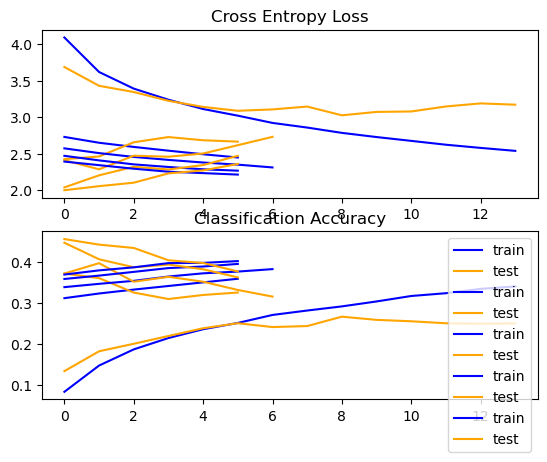

Accuracy: mean=28.658 std=0.468, n=5


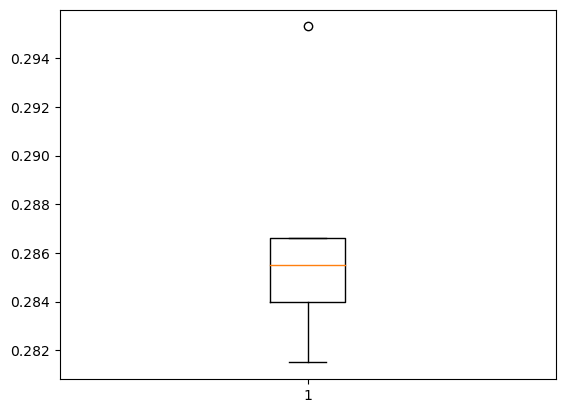

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 average_pooling2d (AverageP  (None, 15, 15, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 6, 6, 64)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 average_pooling2d_2 (Averag  (None, 2, 2, 128)        0

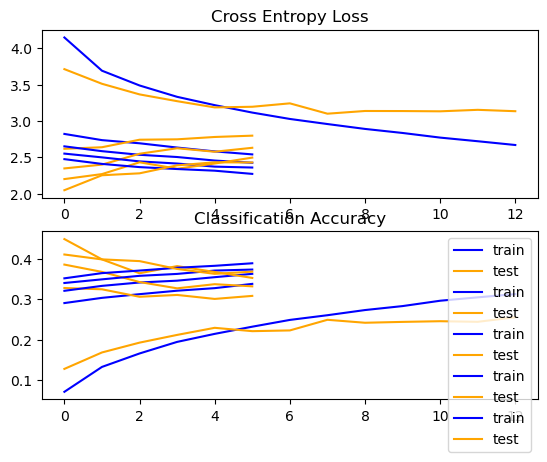

Accuracy: mean=28.474 std=0.712, n=5


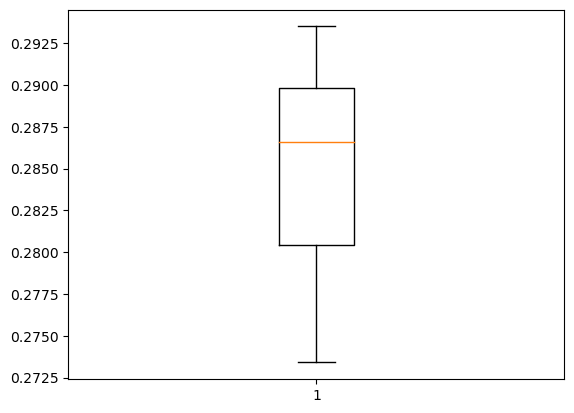

313/313 [==============================] - 1s 2ms/step


In [19]:
def cifar_model_batch_norm_dropout():
    model = Sequential()
    
    model.add(Conv2D(256,(3,3),padding='same',input_shape=(32,32,3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(256,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization(momentum=0.95, 
            epsilon=0.005,
            beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
            gamma_initializer=Constant(value=0.9)))
    model.add(Dense(100,activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])
    return model
cifar_dropout = cifar_model_batch_norm_dropout()




run_test_harness(cifar_dropout,X_train, y_train)

cifar_dropout.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
precision,recall,f1 = get_metrics(cifar_dropout)
Model_scores = pd.concat([Model_scores,pd.DataFrame([['CNN relu avg pooling w padding ',test_acc,test_loss,precision,recall,f1]],columns=Model_scores.columns)],ignore_index=True)

del cifar_dropout
gc.collect()
tf.keras.backend.clear_session()

# Best Optimizers with Activation function

In [20]:
### function for looping through all the models

def tune_model_act_opt(act,opt):
    model = Sequential()
    
    model.add(Conv2D(256,(3,3),padding='same',input_shape=(32,32,3), kernel_initializer=keras.initializers.GlorotNormal(seed=42)))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(Conv2D(256,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation(act))
    model.add(Dropout(0.2))
    model.add(BatchNormalization(momentum=0.95, 
            epsilon=0.005,
            beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
            gamma_initializer=Constant(value=0.9)))
    model.add(Dense(100,activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(histories,act,opt):
		# plot loss
	pyplot.subplot(211)
	pyplot.title(f'Cross Entropy Loss {act},{opt}')
	pyplot.plot(histories.history['loss'], color='blue', label='train')
	pyplot.plot(histories.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title(f'Classification Accuracy {act},{opt}')
	pyplot.plot(histories.history['accuracy'], color='blue', label='train')
	pyplot.plot(histories.history['val_accuracy'], color='orange', label='test')
	pyplot.legend()
	pyplot.show()

def run_test_harness_act_opt(act,opt,X_train, y_train, X_test, y_test,X_val,y_val):
    model = tune_model_act_opt(act,opt)
    # fit model
    h_callback = EarlyStopping(monitor='val_accuracy', patience=5)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
    history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_val, y_val), verbose=0 ,callbacks=[h_callback,reduce_lr])
    # evaluate model
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    # ran into memory leakage problem trying to fix with this
    gc.collect()
    tf.keras.backend.clear_session()
    del model
    print('Test Accuracy>  %.3f' % (test_acc * 100.0))
    print('Test Loss>  %.3f' % (test_loss * 100.0))
    summarize_diagnostics(history,act,opt)
    return (test_acc*100, test_loss*100)
    

Test Accuracy>  36.990
Test Loss>  312.309


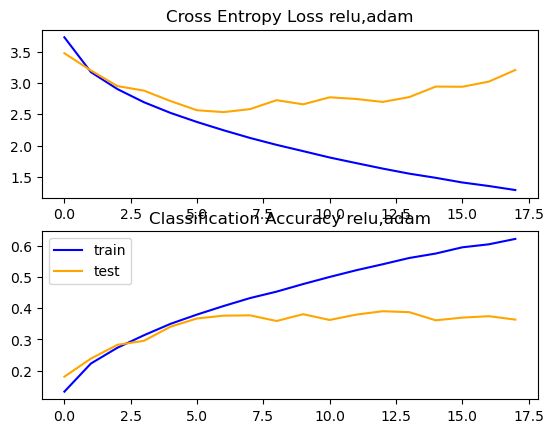

Test Accuracy>  29.100
Test Loss>  312.991


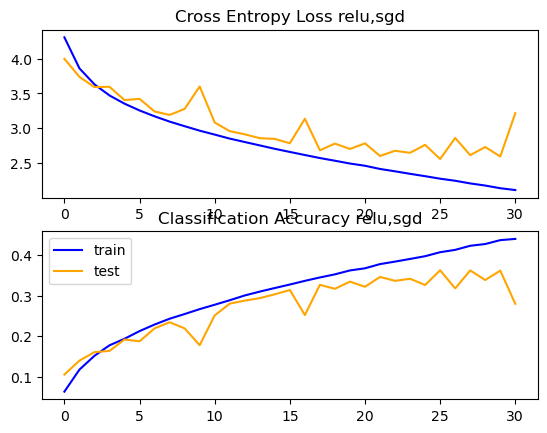

Test Accuracy>  38.120
Test Loss>  296.098


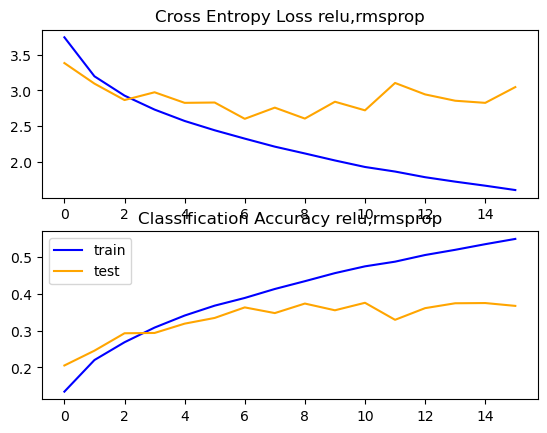

Test Accuracy>  26.430
Test Loss>  303.415


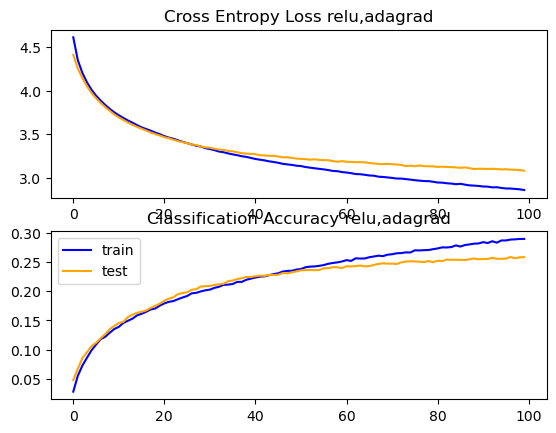

Test Accuracy>  13.220
Test Loss>  378.339


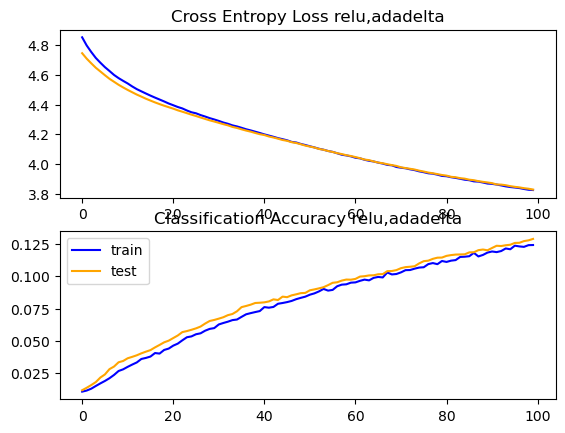

Test Accuracy>  37.060
Test Loss>  322.905


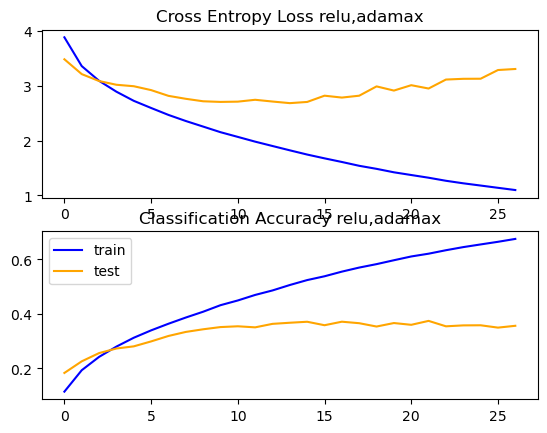

Test Accuracy>  38.140
Test Loss>  320.080


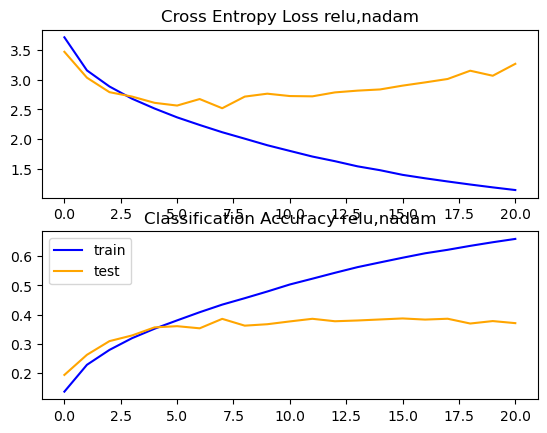

Test Accuracy>  39.730
Test Loss>  275.167


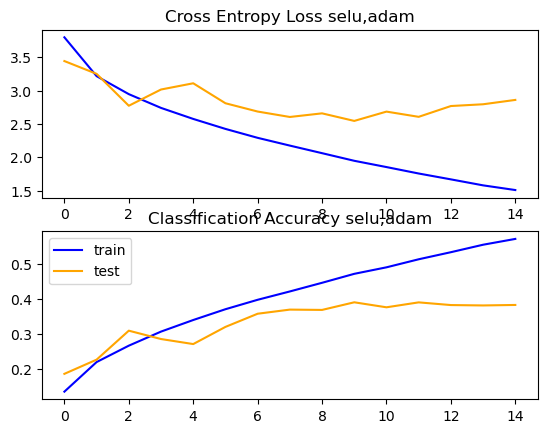

Test Accuracy>  28.580
Test Loss>  296.088


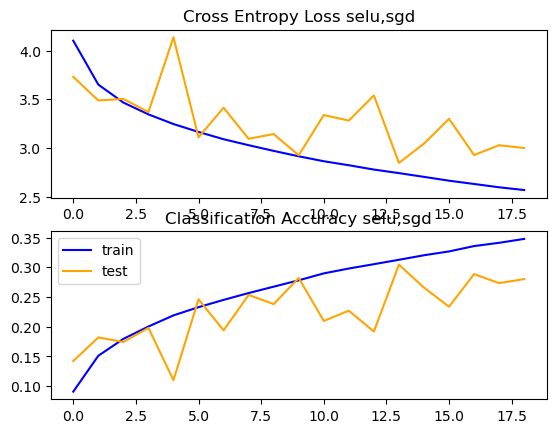

Test Accuracy>  34.430
Test Loss>  312.057


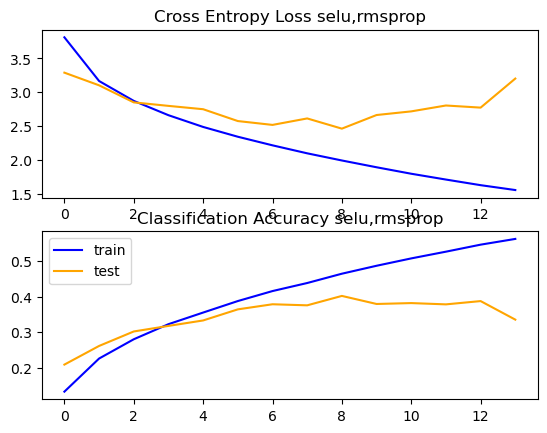

Test Accuracy>  25.450
Test Loss>  310.959


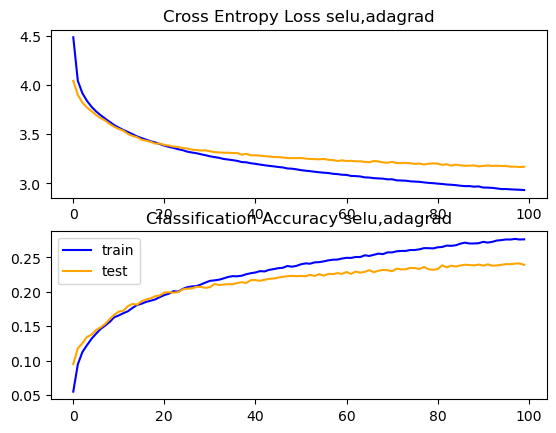

Test Accuracy>  17.660
Test Loss>  354.995


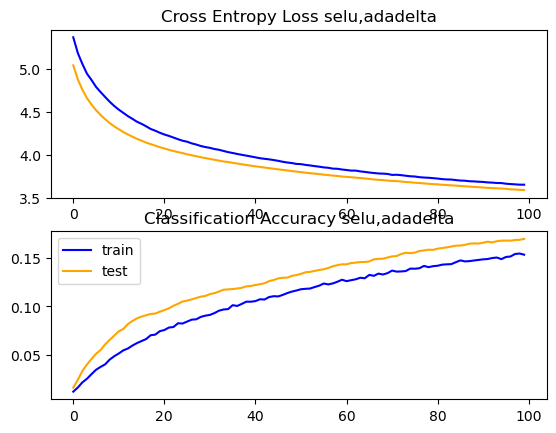

Test Accuracy>  38.690
Test Loss>  287.700


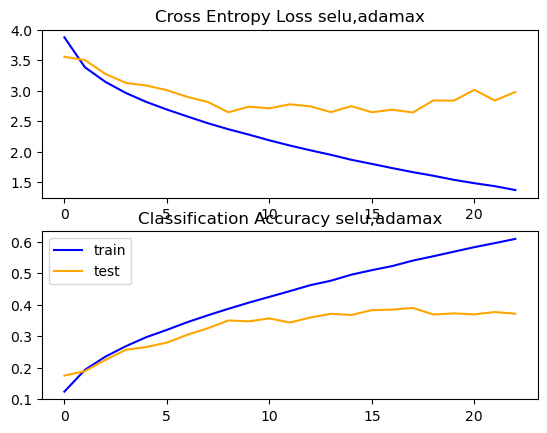

Test Accuracy>  38.100
Test Loss>  302.238


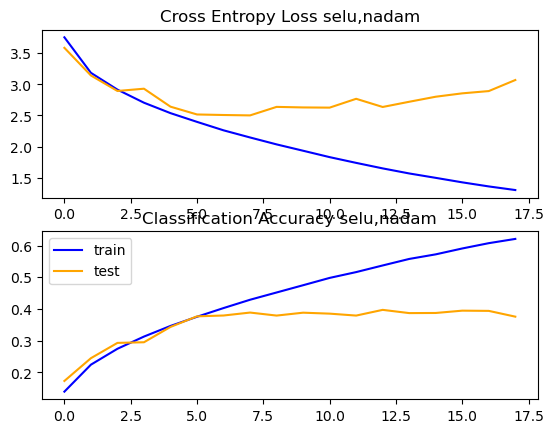

Test Accuracy>  38.930
Test Loss>  275.178


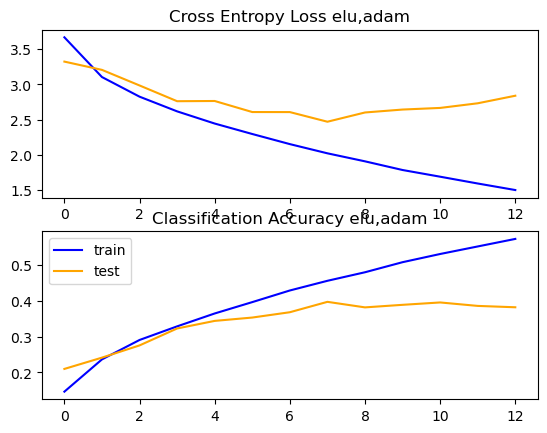

Test Accuracy>  37.980
Test Loss>  270.717


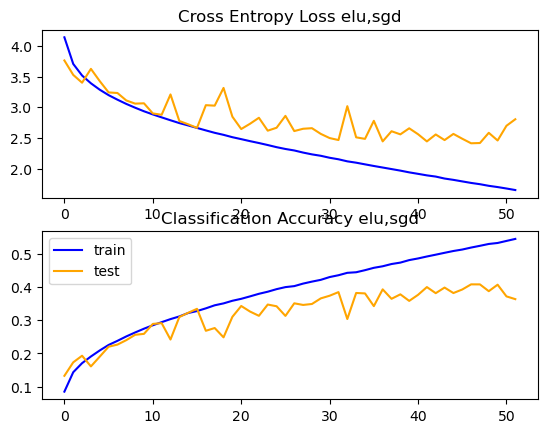

Test Accuracy>  36.730
Test Loss>  309.105


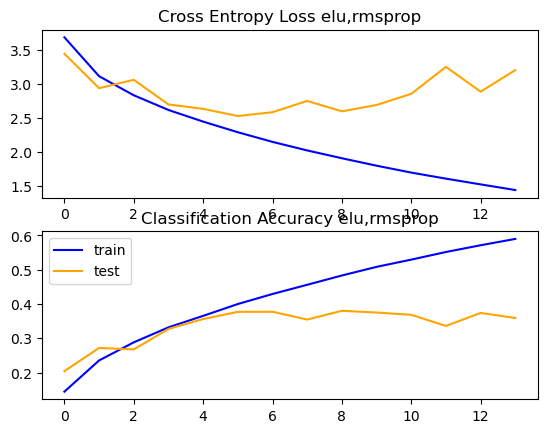

Test Accuracy>  21.330
Test Loss>  333.648


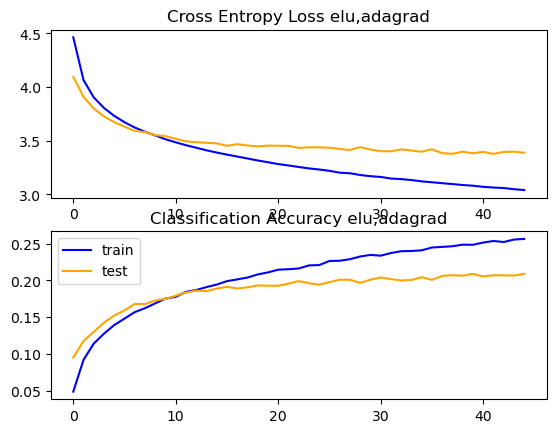

Test Accuracy>  16.280
Test Loss>  359.961


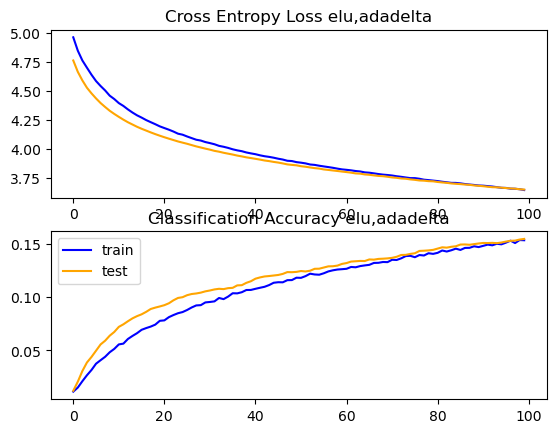

Test Accuracy>  38.280
Test Loss>  296.391


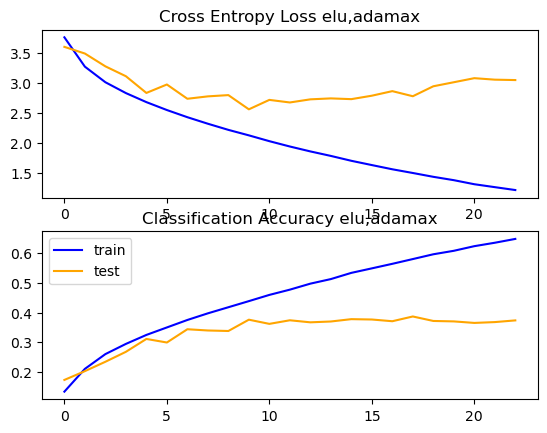

Test Accuracy>  39.350
Test Loss>  273.205


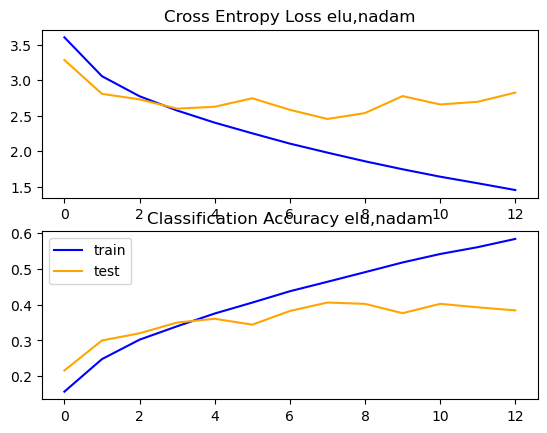

Test Accuracy>  30.920
Test Loss>  285.610


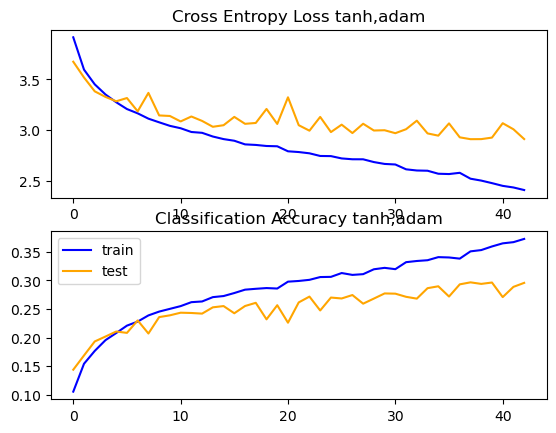

Test Accuracy>  26.580
Test Loss>  299.310


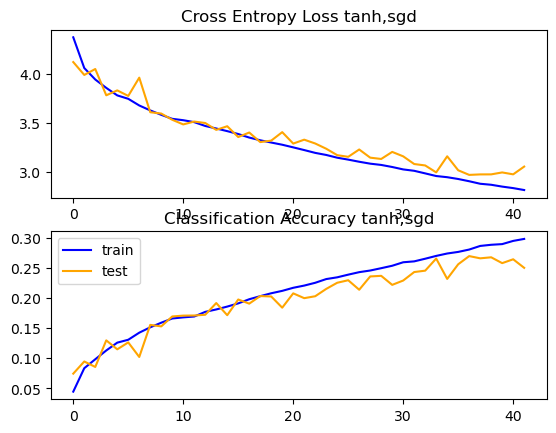

Test Accuracy>  24.310
Test Loss>  318.455


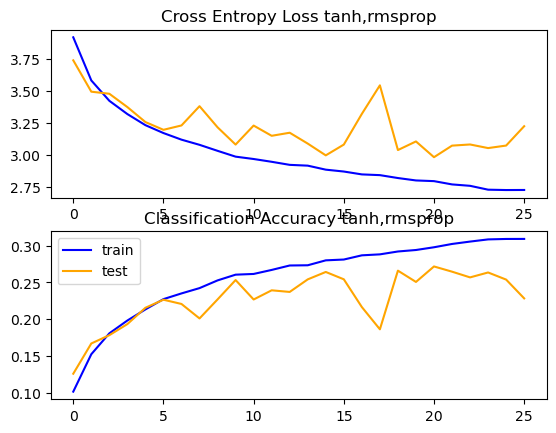

Test Accuracy>  21.940
Test Loss>  328.349


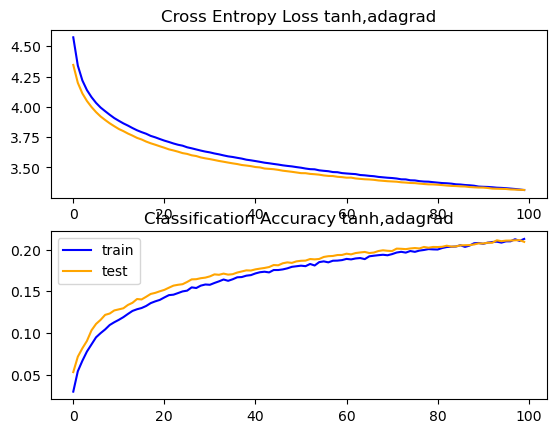

Test Accuracy>  12.750
Test Loss>  385.027


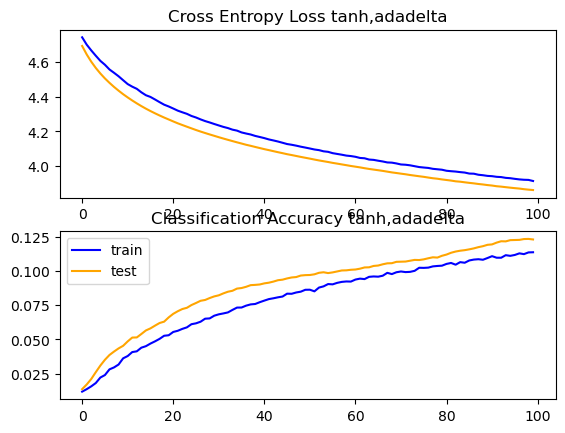

Test Accuracy>  28.460
Test Loss>  298.511


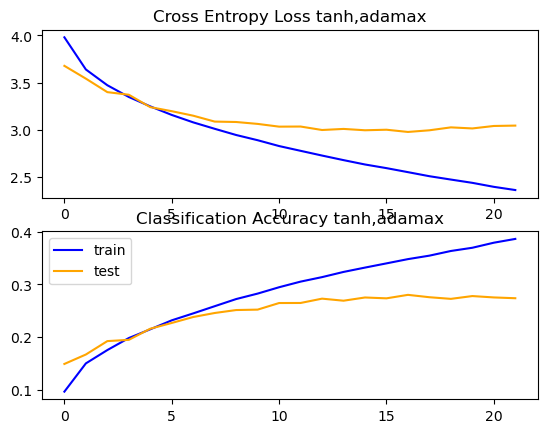

Test Accuracy>  28.770
Test Loss>  291.105


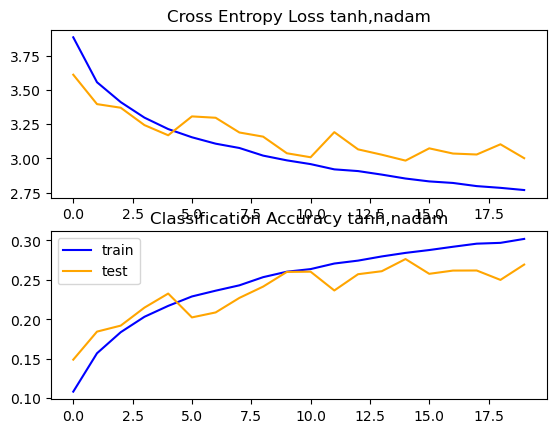

Test Accuracy>  37.540
Test Loss>  301.250


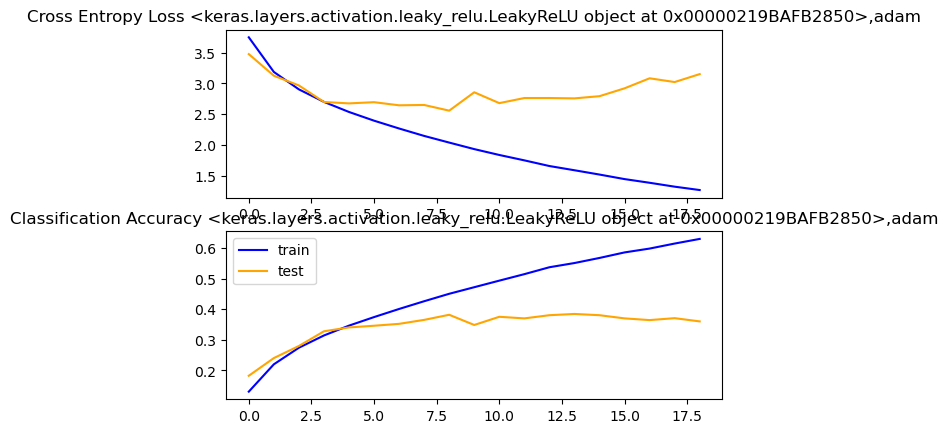

Test Accuracy>  33.460
Test Loss>  281.892


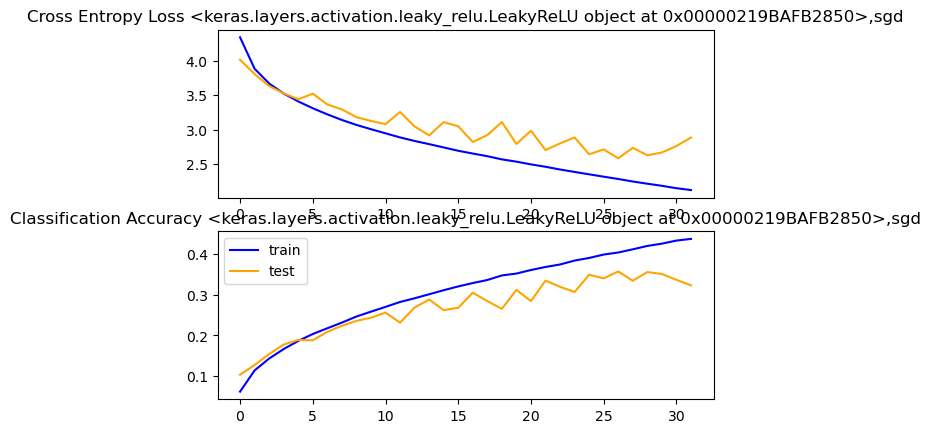

Test Accuracy>  37.410
Test Loss>  329.418


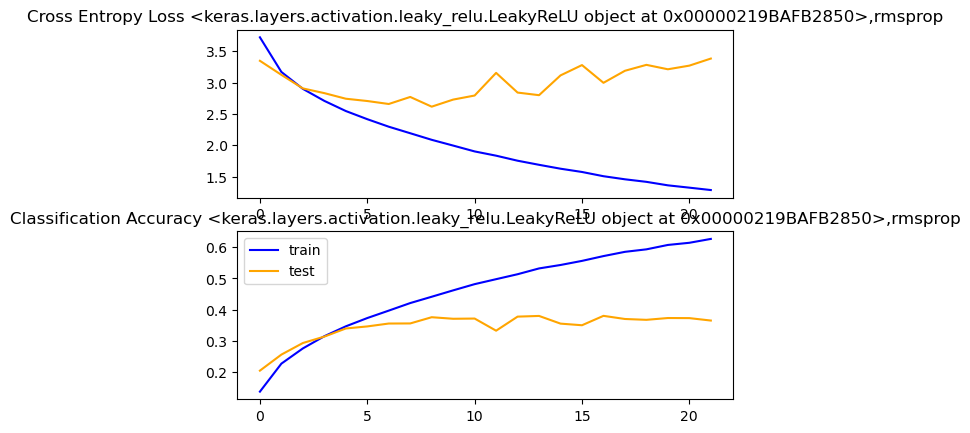

Test Accuracy>  19.360
Test Loss>  343.424


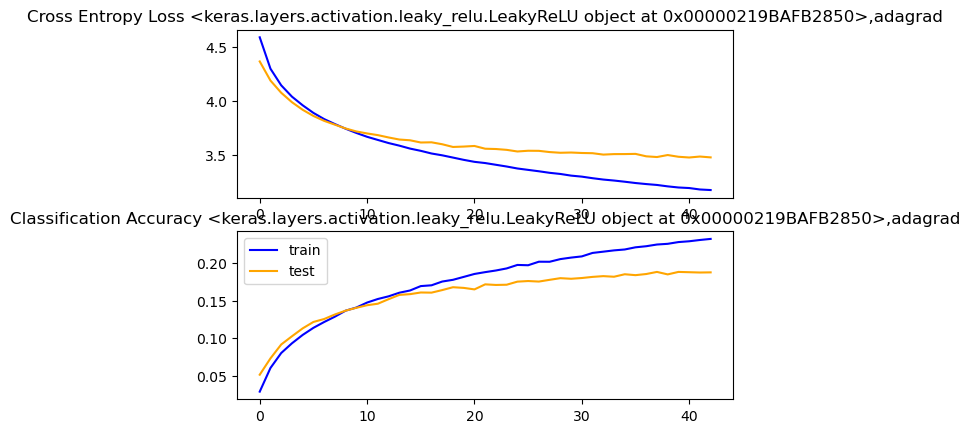

Test Accuracy>  13.670
Test Loss>  377.947


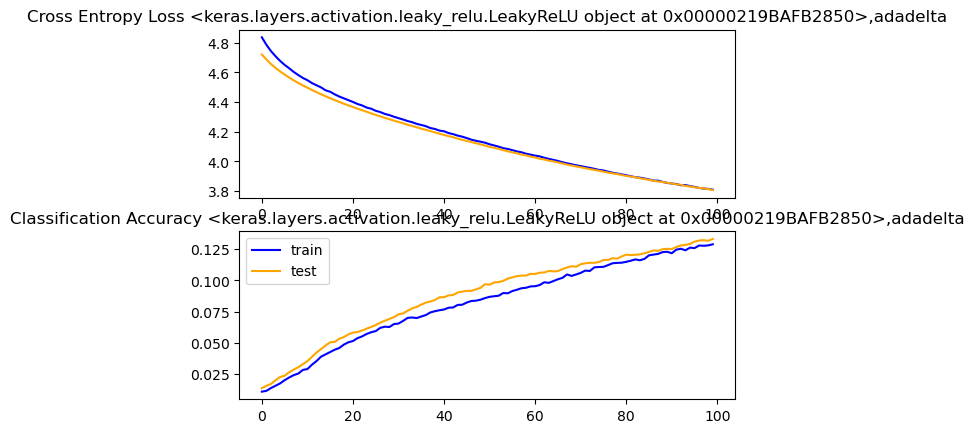

Test Accuracy>  36.470
Test Loss>  310.617


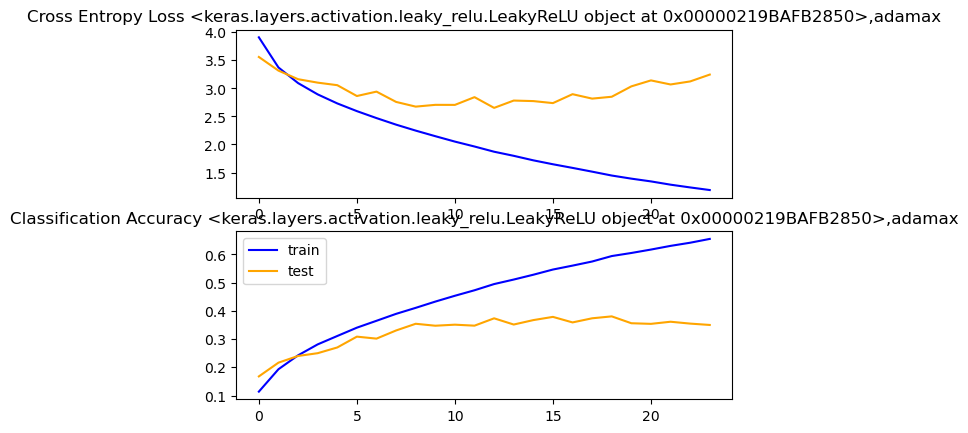

Test Accuracy>  39.740
Test Loss>  286.777


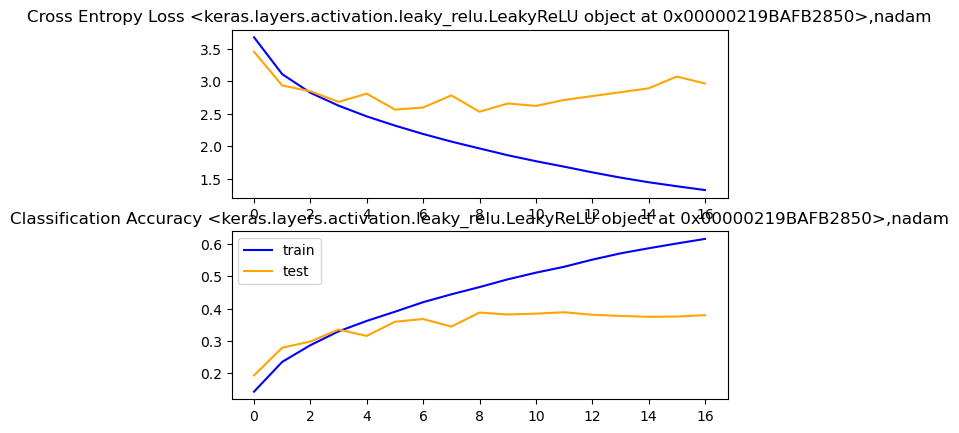

In [21]:
from itertools import product
optimizers = ['adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta', 'adamax', 'nadam']
activation = ['relu', 'selu', 'elu', 'tanh',LeakyReLU(alpha=0.01)]
accuracy_act_opt = list()
loss_act_opt = list()
activation_names = ['relu', 'selu', 'elu', 'tanh','LeakyReLU']
act_opt = list(product(activation_names,optimizers))

for act,opt in product(activation,optimizers):
    acc , loss= run_test_harness_act_opt(act,opt,X_train, y_train, X_test, y_test,X_val,y_val)
    accuracy_act_opt.append(acc)
    loss_act_opt.append(loss)

    



In [22]:
# create a dataframe of scores_act_opt and act_opt
df_act_opt = pd.DataFrame({'act_opt':act_opt,'accuracy':accuracy_act_opt,'loss':loss_act_opt})
# highlight highest score_act_opt in df_act_opt
df_act_opt.style.highlight_max(subset=['accuracy'],color='green', axis=0).highlight_min(subset=['loss'],color='green', axis=0)

# style only score_act_opt in df_act_opt




,act_opt,accuracy,loss
0,"('relu', 'adam')",36.989999,312.309170
1,"('relu', 'sgd')",29.100001,312.991476
2,"('relu', 'rmsprop')",38.119999,296.098280
3,"('relu', 'adagrad')",26.429999,303.414869
4,"('relu', 'adadelta')",13.220000,378.339148
5,"('relu', 'adamax')",37.059999,322.905302
6,"('relu', 'nadam')",38.139999,320.079541
7,"('selu', 'adam')",39.730000,275.166893
8,"('selu', 'sgd')",28.580001,296.087503
9,"('selu', 'rmsprop')",34.430000,312.057114


# Notable pairs
- elu + nadam
- elu + adamax
- Leaky + adamax
- relu + nadam


In [23]:
Model_scores

,Model,Accuracy,Loss,Precision,Recall,F1 Score
0,CNN baseline,0.0951,15.423013,0.096163,0.0951,0.093046
1,simple CNN relu max pooling,0.0951,15.423013,0.196153,0.1962,0.188063
2,simple CNN relu avg pooling,0.0951,15.423013,0.195484,0.1914,0.190871
3,CNN relu avg pooling w padding,0.0951,15.423013,0.190383,0.1937,0.189549
4,CNN relu avg pooling w padding,0.0951,15.423013,0.142972,0.1403,0.136999
5,CNN relu avg pooling w padding,0.0951,15.423013,0.277964,0.2763,0.272116


# Regularization 
## L1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

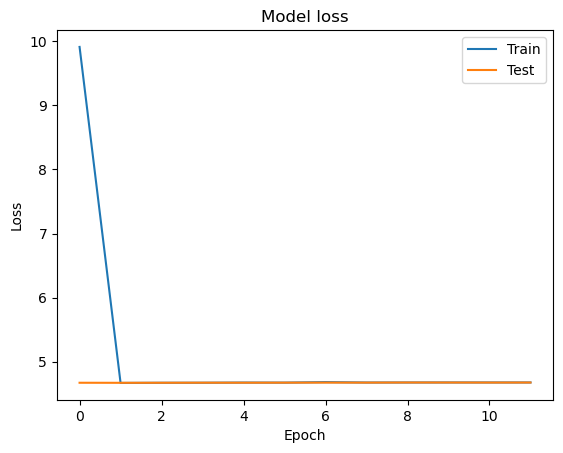

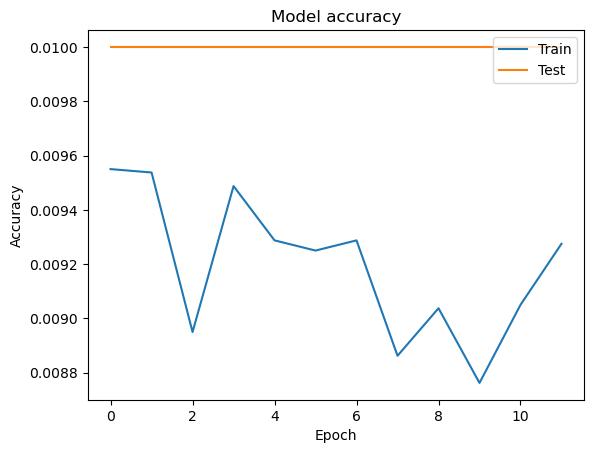

In [24]:
import tensorflow
model = Sequential()
    
model.add(Conv2D(256,(3,3),padding='same',input_shape=(32,32,3), kernel_initializer=keras.initializers.GlorotNormal(seed=42)))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation(act))
model.add(Dropout(0.2))
model.add(BatchNormalization(momentum=0.95, 
            epsilon=0.005,
            beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
            gamma_initializer=Constant(value=0.9)))
model.add(Dense(100,activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'], kernel_regularizer=tensorflow.keras.regularizers.L1(l1=0.05))
#loop through the optimizers
model.compile(optimizer='nadam',
loss=tf.keras.losses.categorical_crossentropy,
metrics=['accuracy'])  
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                patience=5, min_lr=0.001)

h_callback = model.fit(X_train, y_train, epochs = 100,
                validation_data=(X_val, y_val), callbacks=[early_stopping,reduce_lr])
# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])

# evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
precision,recall,f1 = get_metrics(cifar_dropout)
Model_scores = pd.concat([Model_scores,pd.DataFrame([['deep CNN elu nadam batchnorm dropout l1',test_acc,test_loss,precision,recall,f1]],columns=Model_scores.columns)],ignore_index=True)


del model


## L2

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 6, 6, 64)         

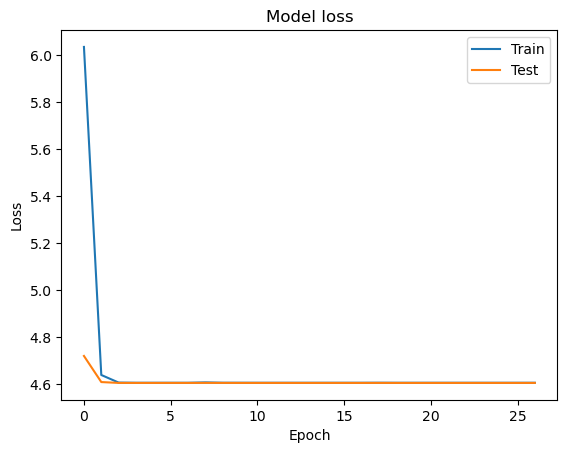

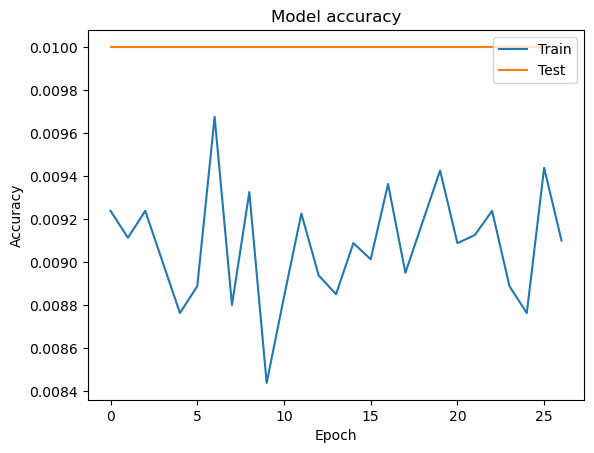

In [25]:
model = Sequential()
    
model.add(Conv2D(256,(3,3),padding='same',input_shape=(32,32,3), kernel_initializer=keras.initializers.GlorotNormal(seed=42)))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation(act))
model.add(Dropout(0.2))
model.add(BatchNormalization(momentum=0.95, 
            epsilon=0.005,
            beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
            gamma_initializer=Constant(value=0.9)))
model.add(Dense(100,activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'], kernel_regularizer=tensorflow.keras.regularizers.L2(l2=0.05))
#loop through the optimizers
model.compile(optimizer='nadam',
loss=tf.keras.losses.categorical_crossentropy,
metrics=['accuracy'])  
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                patience=5, min_lr=0.001)

h_callback = model.fit(X_train, y_train, epochs = 100,
                validation_data=(X_val, y_val), callbacks=[early_stopping,reduce_lr])
# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])

# evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
precision,recall,f1 = get_metrics(cifar_dropout)
Model_scores = pd.concat([Model_scores,pd.DataFrame([['deep CNN elu nadam batchnorm dropout l2 ',test_acc,test_loss,precision,recall,f1]],columns=Model_scores.columns)],ignore_index=True)


del model


## L1L2

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 6, 6, 64)         

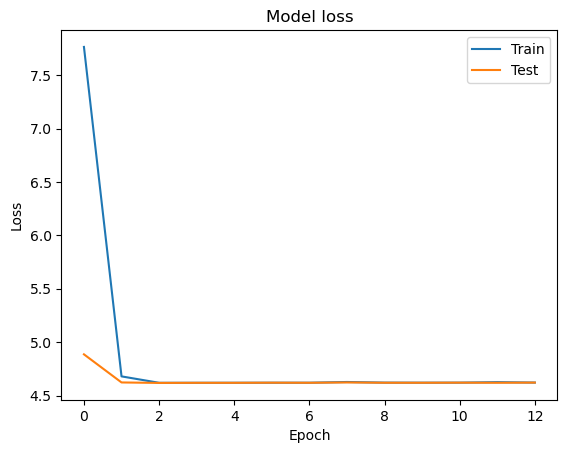

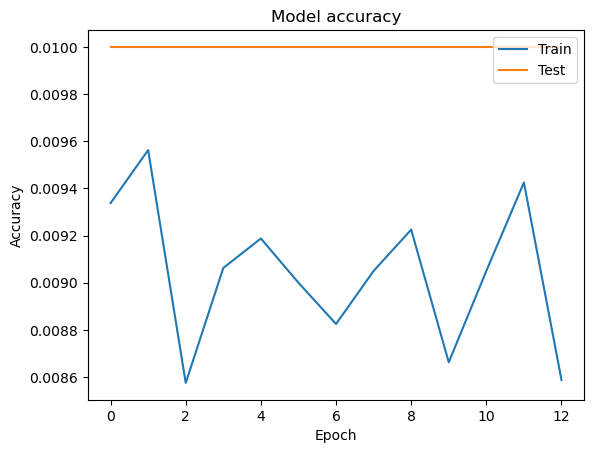

In [26]:
import tensorflow
model = Sequential()
    
model.add(Conv2D(256,(3,3),padding='same',input_shape=(32,32,3), kernel_initializer=keras.initializers.GlorotNormal(seed=42)))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('elu'))
model.add(Dropout(0.2))
model.add(BatchNormalization(momentum=0.95, 
            epsilon=0.005,
            beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
            gamma_initializer=Constant(value=0.9)))
model.add(Dense(100,activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'], kernel_regularizer=tensorflow.keras.regularizers.L1L2(l1=0.05,L2=0.05))
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                patience=5, min_lr=0.001)

h_callback = model.fit(X_train, y_train, epochs = 100,
                validation_data=(X_val, y_val), callbacks=[early_stopping,reduce_lr])
# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])

# evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
precision,recall,f1 = get_metrics(cifar_dropout)
Model_scores = pd.concat([Model_scores,pd.DataFrame([['deep CNN elu nadam batchnorm dropout l1l2',test_acc,test_loss,precision,recall,f1]],columns=Model_scores.columns)],ignore_index=True)

visualkeras.layered_view(model)

del model



In [27]:
Model_scores

,Model,Accuracy,Loss,Precision,Recall,F1 Score
0,CNN baseline,0.0951,15.423013,0.096163,0.0951,0.093046
1,simple CNN relu max pooling,0.0951,15.423013,0.196153,0.1962,0.188063
2,simple CNN relu avg pooling,0.0951,15.423013,0.195484,0.1914,0.190871
3,CNN relu avg pooling w padding,0.0951,15.423013,0.190383,0.1937,0.189549
4,CNN relu avg pooling w padding,0.0951,15.423013,0.142972,0.1403,0.136999
5,CNN relu avg pooling w padding,0.0951,15.423013,0.277964,0.2763,0.272116


# Mid way review of models
- Average pooling seems to be better
- Cifar 100 is a lot harder to classify than MNIST
- Batch Normalization speeds up training
- Go easy on the dropout and regularization first and try to build a better fitted model

# Keras tuner model 1 

In [ ]:
import keras_tuner
from tensorflow import keras
def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Dense(
      hp.Choice('units', [8, 16, 32]),
      activation='relu'))
  model.add(keras.layers.Dense(1, activation='relu'))
  model.compile(loss='mse')
  return model

tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5)

tuner.search(X_train, y_train, epochs=5, validation_data=(X_val, y_val))
best_model = tuner.get_best_models()[0]

In [ ]:

inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs, name="toy_resnet")
model.summary()
keras.utils.plot_model(model, "mini_resnet.png", show_shapes=True)

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["acc"],
)
 
toy_resnet = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_data = [X_val, y_val], callbacks=[early_stopping,reduce_lr])
plot_accuracy_and_loss(toy_resnet)


# Exploring on Cifar 100 (coarse) 20 classes

In [ ]:
# import cifar 10
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode="coarse")
assert X_train.shape == (50000, 32, 32, 3)
assert X_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

# split train and validation set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)


print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)

# print unique classes count
print("Unique classes count:", len(np.unique(y_train)))

# print number of samples in each class
y_train_df = pd.DataFrame(y_train)
print(y_train_df[0].value_counts())

y_test_label = y_test
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)
print('after',y_train.shape,y_test.shape)


# Data augmentation

In [ ]:
X_train_augmented = X_train.copy()
y_train_augmented = y_train.copy()



# ImageDataGenerator rotation
datagen = ImageDataGenerator(
	featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=True,
    zca_epsilon=1e-06,
    rotation_range=90,
    shear_range=0.2,
    zoom_range=0.2,
    channel_shift_range=0.02,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=True)


datagen.fit(X_train_augmented)
X_train_augmented = datagen.flow(X_train_augmented,y_train_augmented, batch_size = X_train.shape[0], shuffle=False).next()
# change X_train_augmented to float32
X_train_augmented = X_train_augmented[0].astype('float32')

plt.imshow(X_train_augmented[12])
plt.show()




# concat the original and augmented data
X_train = np.concatenate((X_train,X_train_augmented),axis=0)
y_train = np.concatenate((y_train,y_train_augmented),axis=0)


In [ ]:


epochs = 15
num_classes = 20
seed = np.random.seed(1)






model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(20))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
mc = ModelCheckpoint('dummy_model_20.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


h_callback = model.fit(X_train, y_train, epochs = 10,
               validation_data=(X_val, y_val) , callbacks=[early_stopping, mc])

# Plot train vs test loss during training 
plot_accuracy_and_loss(h_callback)



# Feature wise Normalizaion, Centering or Standardization does it help?

- Pixel Normalization: scale pixel values to the range 0-1. 
- Pixel Centering: scale pixel values to have a zero mean. (images seem to be already centered)
- Pixel Standardization: scale pixel values to have a zero mean and unit variance. (Images are already standardized as they all have pixels from 0 to 255)

In [ ]:
# baseline cnn model for cifar mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import cifar_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping


# evaluate a model using k-fold cross-validation
def evaluate_model(model,dataX, dataY, n_folds=5,valX=X_val,valy=y_val):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		h_callback = EarlyStopping(monitor='val_loss', patience=5)
		# fit model
		history = model.fit(trainX, trainY, epochs=50, validation_data=(testX, testY), verbose=0,callbacks=[h_callback], batch_size=32) 
		# evaluate model
		_, acc = model.evaluate(valX, valy, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# append scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(211)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(212)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
		pyplot.legend()
	pyplot.show()

# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()

# run the test harness for evaluating a model
def run_test_harness(model,X_train, y_train):
	# evaluate model
	scores, histories = evaluate_model(model,X_train, y_train)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)


# CNNs 
### Max Pooling
- With every stride the highest number found is retrieved in an area
- Effective as a noise suppresant discarding all noisy activations and only taking the prominant feature in an area 

### Average Pooling 
- Retrieves the average of all the values in an area
- may not perform as well as max pooling since it is just averaging the noise in images

In [ ]:
def model_max_pooling():
    # define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='linear'))
    model.add(Dense(num_classes, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    return model

run_test_harness(model_max_pooling(),X_train, y_train)


In [ ]:
from keras.layers import AveragePooling2D
def model_average_pooling():
    # define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,3)))
    model.add(AveragePooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='linear'))
    model.add(Dense(num_classes, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    return model

### Conclusion Max Pooling or Average Pooling
> 

# Padding ( is it important? )

In [ ]:
def model_padding():
    # define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,3)), padding='same')
    model.add(MaxPooling2D((2, 2)), padding='same')
    model.add(Flatten())
    model.add(Dense(128, activation='linear'), padding='same')
    model.add(Dense(num_classes, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    return model

run_test_harness(model_padding(),X_train, y_train)

# Batch Normalization

In [ ]:
%%time
from keras.layers import BatchNormalization
def cifar_model_batch_norm():
    cifar_model_batch = Sequential()
    cifar_model_batch.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,3)))

    cifar_model_batch.add(Conv2D(64, (3, 3), activation='linear'))
    cifar_model_batch.add(BatchNormalization())
    cifar_model_batch.add(Flatten())
    cifar_model_batch.add(Dense(128, activation='linear'))
    cifar_model_batch.add(Dense(num_classes, activation='softmax'))
    cifar_model_batch.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    cifar_model_batch.summary()
    return cifar_model_batch

run_test_harness(cifar_model_batch_norm(),X_train, y_train)




# Adding dropout

In [ ]:
def model_dropout():
    cifar_model = Sequential()
    cifar_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32,32,3)))
    cifar_model.add(MaxPooling2D((2, 2)))
    cifar_model.add(Conv2D(64, (3, 3), activation='relu'))
    cifar_model.add(MaxPooling2D(pool_size=(2, 2)))
    cifar_model.add(Conv2D(128, (3, 3), activation='relu'))
    cifar_model.add(MaxPooling2D(pool_size=(2, 2)))
    cifar_model.add(Flatten())
    cifar_model.add(Dense(128, activation='relu'))
    cifar_model.add(Dropout(0.2))
    cifar_model.add(Dense(num_classes, activation='softmax'))

    cifar_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    cifar_model.summary()
    return cifar_model

run_test_harness(model_dropout(),X_train, y_train)


# Best Optimizers with Activation function

In [ ]:
from keras.callbacks import ReduceLROnPlateau
### function for looping through all the models
def tune_model_act_opt(act,opt):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                    activation=act,
                    kernel_initializer='he_normal',
                    input_shape=(32,32,3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation=act))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3), activation=act))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation=act))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))  
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(histories,act,opt):
		# plot loss
	pyplot.subplot(211)
	pyplot.title(f'Cross Entropy Loss {act},{opt}')
	pyplot.plot(histories.history['loss'], color='blue', label='train')
	pyplot.plot(histories.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title(f'Classification Accuracy {act},{opt}')
	pyplot.plot(histories.history['accuracy'], color='blue', label='train')
	pyplot.plot(histories.history['val_accuracy'], color='orange', label='test')
	pyplot.legend()
	pyplot.show()

def run_test_harness_act_opt(act,opt,X_train, y_train, X_test, y_test,X_val,y_val):
    model = tune_model_act_opt(act,opt)
    # fit model
    h_callback = EarlyStopping(monitor='val_accuracy', patience=5)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
    history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_val, y_val), verbose=0 ,callbacks=[h_callback,reduce_lr])
    # evaluate model
    _, acc = model.evaluate(X_test, y_test, verbose=0)
    print('> %.3f' % (acc * 100.0))
    summarize_diagnostics(history,act,opt)
    return (acc*100)
    

In [ ]:
from itertools import product
optimizers = ['adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta', 'adamax', 'nadam']
activation = ['relu', 'selu', 'elu', 'tanh',LeakyReLU(alpha=0.01)]
scores_act_opt = list()
activation_names = ['relu', 'selu', 'elu', 'tanh','LeakyReLU']
act_opt = list(product(activation_names,optimizers))

for act,opt in product(activation,optimizers):
    acc = run_test_harness_act_opt(act,opt,X_train, y_train, X_test, y_test,X_val,y_val)
    scores_act_opt.append(acc)
    



# Regularization 
## L1

In [ ]:
import tensorflow
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                kernel_initializer='he_normal',
                input_shape=(32,32,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(10, activation='softmax', kernel_regularizer=tensorflow.keras.regularizers.L1(l1=0.05)))
#loop through the optimizers
model.compile(optimizer='adam',
loss=tf.keras.losses.categorical_crossentropy,
metrics=['accuracy'])  
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                patience=5, min_lr=0.001)

h_callback = model.fit(X_train, y_train, epochs = 100,
                validation_data=(X_val, y_val), callbacks=[early_stopping,reduce_lr])
# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])


# L2

In [ ]:
import tensorflow
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                kernel_initializer='he_normal',
                input_shape=(32,32,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(10, activation='softmax', kernel_regularizer=tensorflow.keras.regularizers.L2(l2=0.05)))
#loop through the optimizers
model.compile(optimizer='adam',
loss=tf.keras.losses.categorical_crossentropy,
metrics=['accuracy'])  
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                patience=5, min_lr=0.001)

h_callback = model.fit(X_train, y_train, epochs = 100,
                validation_data=(X_val, y_val), callbacks=[early_stopping,reduce_lr])

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])


## L1L2

In [ ]:
import tensorflow
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                kernel_initializer='he_normal',
                input_shape=(32,32,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(10, activation='softmax', kernel_regularizer=tensorflow.keras.regularizers.L1L2(l1=0.01, l2=0.01)))
#loop through the optimizers
model.compile(optimizer='adam',
loss=tf.keras.losses.categorical_crossentropy,
metrics=['accuracy'])  
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                patience=5, min_lr=0.001)

h_callback = model.fit(X_train, y_train, epochs = 100,
                validation_data=(X_val, y_val), callbacks=[early_stopping,reduce_lr])

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])


In [ ]:
# online model
# build and compile the model  (roughly following the VGG paper)

#reg=l2(1e-4)   # L2 or "ridge" regularisation
reg=None
num_filters=32
ac='relu'
adm=Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
opt=adm
drop_dense=0.5
drop_conv=0

model = Sequential()

model.add(Conv2D(num_filters, (3, 3), activation=ac, kernel_regularizer=reg, input_shape=(img_rows, img_cols, channels),padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 16x16x3xnum_filters
model.add(Dropout(drop_conv))

model.add(Conv2D(2*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(2*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 8x8x3x(2*num_filters)
model.add(Dropout(drop_conv))

model.add(Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 4x4x3x(4*num_filters)
model.add(Dropout(drop_conv))

model.add(Flatten())
model.add(Dense(512, activation=ac,kernel_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt)
model.summary()

In [ ]:
# training without augmentation
history=model.fit(X_train, y_train, batch_size=128, epochs=100, validation_data=(X_val, y_val))
#training accuracy without dropout
train_acc=model.evaluate(X_train,y_train,batch_size=128)
test_acc= model.evaluate(X_test,y_test,batch_size=128)
print('Training accuracy: ',train_acc[1])
print('Test accuracy: ',test_acc[1])


# Keras tuner model 1 

In [ ]:
import keras_tuner
from tensorflow import keras
def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Dense(
      hp.Choice('units', [8, 16, 32]),
      activation='relu'))
  model.add(keras.layers.Dense(1, activation='relu'))
  model.compile(loss='mse')
  return model

tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5)

tuner.search(X_train, y_train, epochs=5, validation_data=(X_val, y_val))
best_model = tuner.get_best_models()[0]

# things not done :
- data frame for all models 
- create a classification_report for best model
- show some images that is predicted wrongly for both
- padding for fashion
- shared layer for both is it better?
- why is standardization import or centering does it improve performance
